In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
hundred_enc_out = pd.read_excel('./data/real_enc.xlsx').iloc[:,1::]
basic_enc_out = pd.read_excel('./data/basic_enc.xlsx').iloc[:,1::]
basic_form_enc_out = pd.read_excel('./data/basic_formula_enc.xlsx').iloc[:,1::]
result_enc_out = pd.read_excel('./data/result_enc.xlsx').iloc[:,1::]
result_not_consider_enc_out = pd.read_excel('./data/result_not_consider_enc.xlsx').iloc[:,1::]
reinforce_enc_out = pd.read_excel('./data/reinforce_enc.xlsx').iloc[:,1::]
ae_enc_out = pd.read_excel('./data/ae_result_enc.xlsx').iloc[:,1::]
dqn_enc_out = pd.read_excel('./data/dqn_result_enc.xlsx').iloc[:,1::]

In [33]:
hundred = np.round(pd.read_excel('./data/real_enc.xlsx').iloc[:,1::].to_numpy(), 2)
basic = np.round(pd.read_excel('./data/basic_enc.xlsx').iloc[:,1::].to_numpy(), 2)
basic_form = np.round(pd.read_excel('./data/basic_formula_enc.xlsx').iloc[:,1::].to_numpy(), 2)
result = np.round(pd.read_excel('./data/result_enc.xlsx').iloc[:,1::].to_numpy(), 2)
result_not_consider = np.round(pd.read_excel('./data/result_not_consider_enc.xlsx').iloc[:,1::].to_numpy(), 2)
reinforce = np.round(pd.read_excel('./data/reinforce_enc.xlsx').iloc[:,1::].to_numpy(), 2)
ae = np.round(pd.read_excel('./data/ae_result_enc.xlsx').iloc[:,1::].to_numpy(), 2)
dqn = np.round(pd.read_excel('./data/dqn_result_enc.xlsx').iloc[:,1::].to_numpy(), 2)

h_b = np.intersect1d(hundred, basic)
bf_r = np.intersect1d(basic_form, result)
rn_rf = np.intersect1d(result_not_consider, reinforce)
ae_dqn = np.intersect1d(ae, dqn)

check = np.intersect1d(h_b, bf_r)
check = np.intersect1d(check, rn_rf)
check = np.intersect1d(check, ae_dqn)

check_list = check.tolist()
print(len(check_list))

14


In [34]:
import random

saving = []
while True:
    temp = []
    for i in range(3):
        if len(check_list) == 0:
            break
        temp.append(check_list.pop())
        random.shuffle(check_list)
    if len(check_list) == 0:
            break
    saving.append(temp)

saving = np.array(saving)

In [35]:
saving

array([[ 0.31,  0.02,  0.24],
       [ 0.08, -0.07,  0.04],
       [-0.23,  0.05, -0.04],
       [-0.22, -0.1 ,  0.13]])

In [36]:
import tensorflow as tf

In [37]:
decoder = tf.keras.models.load_model('decoder.h5')
saving = decoder.predict(saving)

1/1 [==============================] - 0s 185ms/step


In [38]:
de_pd_saving = pd.DataFrame(saving)
de_pd_saving.to_excel('saving_scaled.xlsx')

In [39]:
saving.shape

(4, 21)

In [40]:
from pickle import load
scaler = load(open('scaler.pkl', 'rb'))

saving_ = scaler.inverse_transform(saving)

In [41]:
saving_pd = pd.DataFrame(saving_)
saving_pd.to_excel('saving.xlsx')

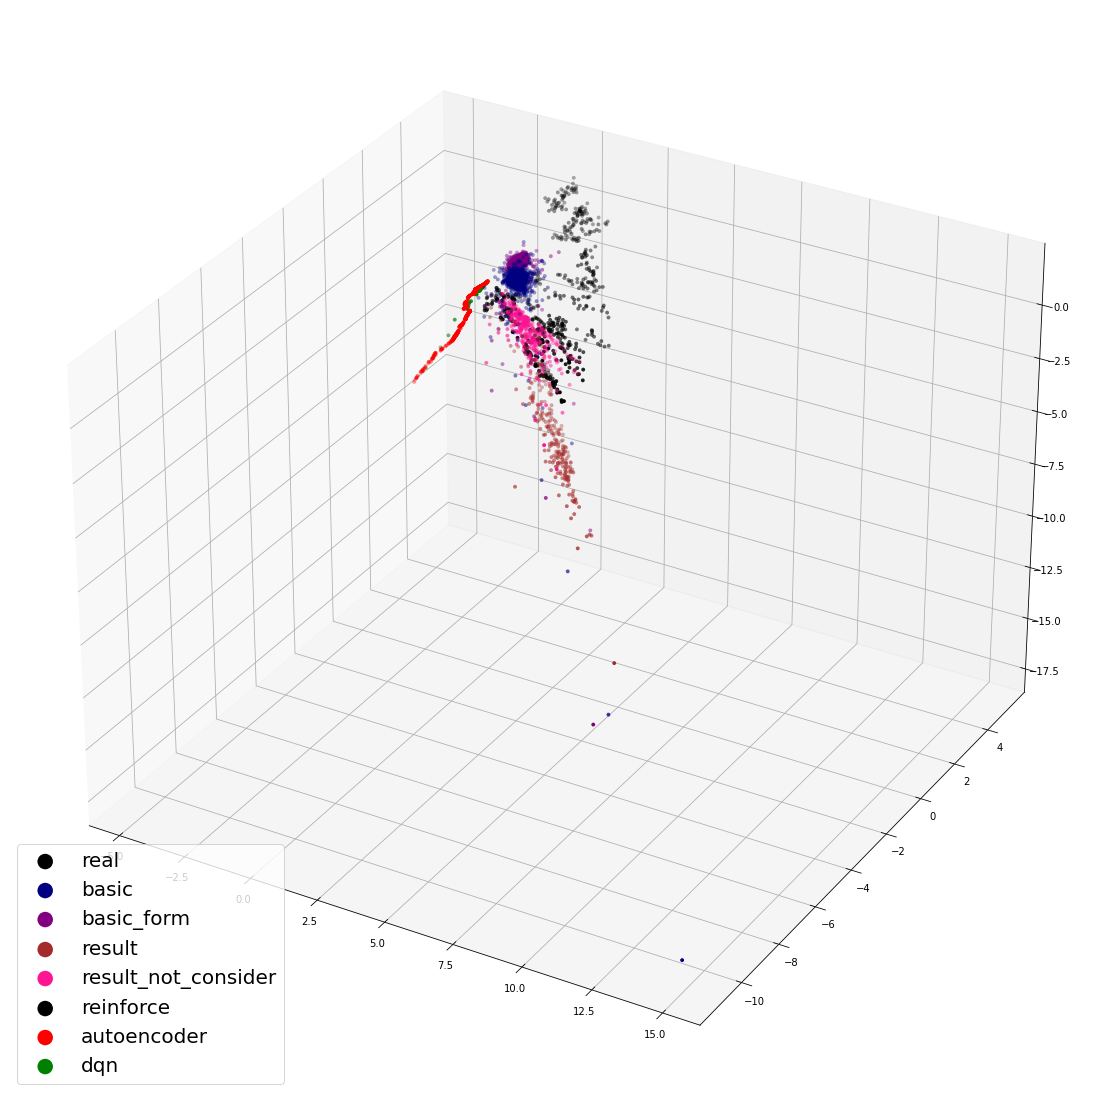

In [42]:
from matplotlib import animation

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

def init():
    ax.scatter(hundred_enc_out[0], hundred_enc_out[1], hundred_enc_out[2],
                    edgecolor='none', s=15, c='k', label='real')

    ax.scatter(basic_enc_out[0], basic_enc_out[1], basic_enc_out[2],
                    edgecolor='none', s=15, c='navy', label='basic')

    ax.scatter(basic_form_enc_out[0], basic_form_enc_out[1], basic_form_enc_out[2],
                    edgecolor='none', s=15, c='purple', label='basic_form')

    ax.scatter(result_enc_out[0], result_enc_out[1], result_enc_out[2],
                    edgecolor='none', s=15, c='brown', label='result')

    ax.scatter(result_not_consider_enc_out[0], result_not_consider_enc_out[1], result_not_consider_enc_out[2],
                    edgecolor='none', s=15, c='deeppink', label='result_not_consider')

    ax.scatter(reinforce_enc_out[0], reinforce_enc_out[1], reinforce_enc_out[2],
                    edgecolor='none', s=15, c='black', label='reinforce')

    ax.scatter(ae_enc_out[0], ae_enc_out[1], ae_enc_out[2],
                    edgecolor='none', s=15, c='r', label='autoencoder')
    
    ax.scatter(dqn_enc_out[0], dqn_enc_out[1], dqn_enc_out[2],
                    edgecolor='none', s=15, c='g', label='dqn')

    plt.legend(loc="lower left", markerscale=4., scatterpoints=1, fontsize=20)

    return fig, 

def animate(i):
    ax.view_init(elev=30., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


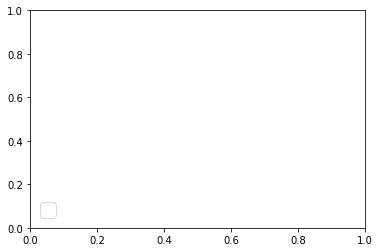

In [43]:
anim.save('using_all.gif', writer='pillow', fps=30)